In [3]:
pacman::p_load("tidyverse", "ggpubr")

In [4]:
df <- data.frame(id=c(1:10), days=c(5.3,6.0,6.7,5.5,6.2,6.4,5.7,7.5,7.2,7.9), group=as.factor(c(1,1,1,2,2,2,2,3,3,3)))
df

id,days,group
<int>,<dbl>,<fct>
1,5.3,1
2,6.0,1
3,6.7,1
4,5.5,2
5,6.2,2
6,6.4,2
7,5.7,2
8,7.5,3
9,7.2,3


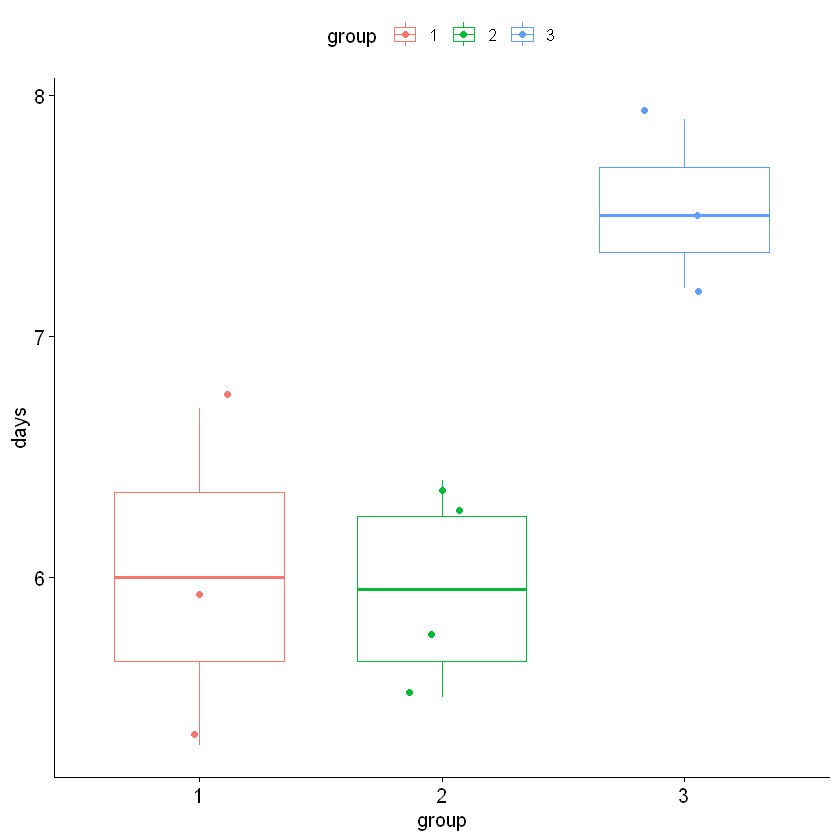

In [5]:
ggboxplot(df, x='group', y='days', col='group', add='jitter')

In [6]:
df.added.mean <- df %>% group_by(group) %>% mutate(group.mean=mean(days))
df.added.mean

id,days,group,group.mean
<int>,<dbl>,<fct>,<dbl>
1,5.3,1,6.000000
2,6.0,1,6.000000
3,6.7,1,6.000000
4,5.5,2,5.950000
5,6.2,2,5.950000
6,6.4,2,5.950000
7,5.7,2,5.950000
8,7.5,3,7.533333
9,7.2,3,7.533333


In [8]:
df.added.mean$btwn <- (df.added.mean$group.mean - mean(df.added.mean$days))^2
df.added.mean

id,days,group,group.mean,btwn
<int>,<dbl>,<fct>,<dbl>,<dbl>
1,5.3,1,6.000000,0.193600
2,6.0,1,6.000000,0.193600
3,6.7,1,6.000000,0.193600
4,5.5,2,5.950000,0.240100
5,6.2,2,5.950000,0.240100
6,6.4,2,5.950000,0.240100
7,5.7,2,5.950000,0.240100
8,7.5,3,7.533333,1.195378
9,7.2,3,7.533333,1.195378


In [9]:
df.added.mean$wthin <- (df.added.mean$days - df.added.mean$group.mean)^2
df.added.mean

id,days,group,group.mean,btwn,wthin
<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,5.3,1,6.000000,0.193600,0.490000000
2,6.0,1,6.000000,0.193600,0.000000000
3,6.7,1,6.000000,0.193600,0.490000000
4,5.5,2,5.950000,0.240100,0.202500000
5,6.2,2,5.950000,0.240100,0.062500000
6,6.4,2,5.950000,0.240100,0.202500000
7,5.7,2,5.950000,0.240100,0.062500000
8,7.5,3,7.533333,1.195378,0.001111111
9,7.2,3,7.533333,1.195378,0.111111111


In [10]:
btwn.var <- sum(df.added.mean$btwn)
btwn.var

[1] 5.127333

In [11]:
wthin.var <- sum(df.added.mean$wthin)
wthin.var

[1] 1.756667

between variance degree of freedom is 2(# of groups (3) -1).   
within variance degree of freedom is 7(# of samples 10 - # of group 3).

In [17]:
### F statistic
(btwn.var/2) / (wthin.var/7) ## 2 is # of group (3) -1 // 7 is # of samples 10 - # of group 3

[1] 10.21575

Sum Sq of Group is the same as btwn.var.  
Sum Sq of Residuals is the same as wthin.var

In [18]:
df.anvr <- aov(days ~ group, data=df.added.mean)
summary(df.anvr) 

            Df Sum Sq Mean Sq F value  Pr(>F)   
group        2  5.127   2.564   10.22 0.00839 **
Residuals    7  1.757   0.251                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [16]:
TukeyHSD(df.anvr)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = days ~ group, data = df.added.mean)

$group
         diff        lwr      upr     p adj
2-1 -0.050000 -1.1768029 1.076803 0.9906417
3-1  1.533333  0.3287303 2.737936 0.0172584
3-2  1.583333  0.4565304 2.710136 0.0105959
